# Merge forecast and konkorde

This notebook simply merges the predictions made by the ensemble of LSTMs (forecast file) and the konkorde signal produced by the `indicators.py` module.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = '/Users/renero/trader/output/konkorde_DAX_2015_2019.csv'
kdata = pd.read_csv(path)
kdata.head()

,actual,4yw30,4yw20,4yw10,avg,avg_diff,median,med_diff,winner,verde,azul
0,10963.400391,11046.686462,11046.686462,11046.686462,11046.686462,8782.576110,11046.686462,8782.576110,4yw30,-0.670813,-0.305903
1,10923.230469,10964.830078,10964.830078,10964.830078,10964.830078,8740.889648,10964.830078,8740.889648,4yw30,-0.670813,-0.305903
2,10895.620117,10953.365234,10953.365234,10953.365234,10953.365234,8757.035156,10953.365234,8757.035156,4yw30,-0.670813,-0.310967
3,10961.000000,10975.943848,10975.943848,10975.943848,10975.943848,8714.233887,10975.943848,8714.233887,4yw30,-0.670813,-0.230551
4,11001.940430,10972.057861,10972.057861,10993.472120,10979.195948,8722.034521,10975.626905,8725.603564,4yw10,-0.670813,-0.248951


In [3]:
path = '/Users/renero/trader/output/forecast_DAX_2015_2019_4yw30_4yw20_4yw10.csv'
fc = pd.read_csv(path)
fc.head()

,Date,actual,w_avg
0,2015-02-13,10963.40,11046.69
1,2015-02-16,10923.23,10964.83
2,2015-02-17,10895.62,10953.37
3,2015-02-18,10961.00,10975.94
4,2015-02-19,11001.94,10975.03


In [4]:
df = pd.concat([fc, kdata], axis=1)
df.head()

,Date,actual,w_avg,actual,4yw30,4yw20,4yw10,avg,avg_diff,median,med_diff,winner,verde,azul
0,2015-02-13,10963.40,11046.69,10963.400391,11046.686462,11046.686462,11046.686462,11046.686462,8782.576110,11046.686462,8782.576110,4yw30,-0.670813,-0.305903
1,2015-02-16,10923.23,10964.83,10923.230469,10964.830078,10964.830078,10964.830078,10964.830078,8740.889648,10964.830078,8740.889648,4yw30,-0.670813,-0.305903
2,2015-02-17,10895.62,10953.37,10895.620117,10953.365234,10953.365234,10953.365234,10953.365234,8757.035156,10953.365234,8757.035156,4yw30,-0.670813,-0.310967
3,2015-02-18,10961.00,10975.94,10961.000000,10975.943848,10975.943848,10975.943848,10975.943848,8714.233887,10975.943848,8714.233887,4yw30,-0.670813,-0.230551
4,2015-02-19,11001.94,10975.03,11001.940430,10972.057861,10972.057861,10993.472120,10979.195948,8722.034521,10975.626905,8725.603564,4yw10,-0.670813,-0.248951


AttributeError: 'DataFrame' object has no attribute 'test_y'

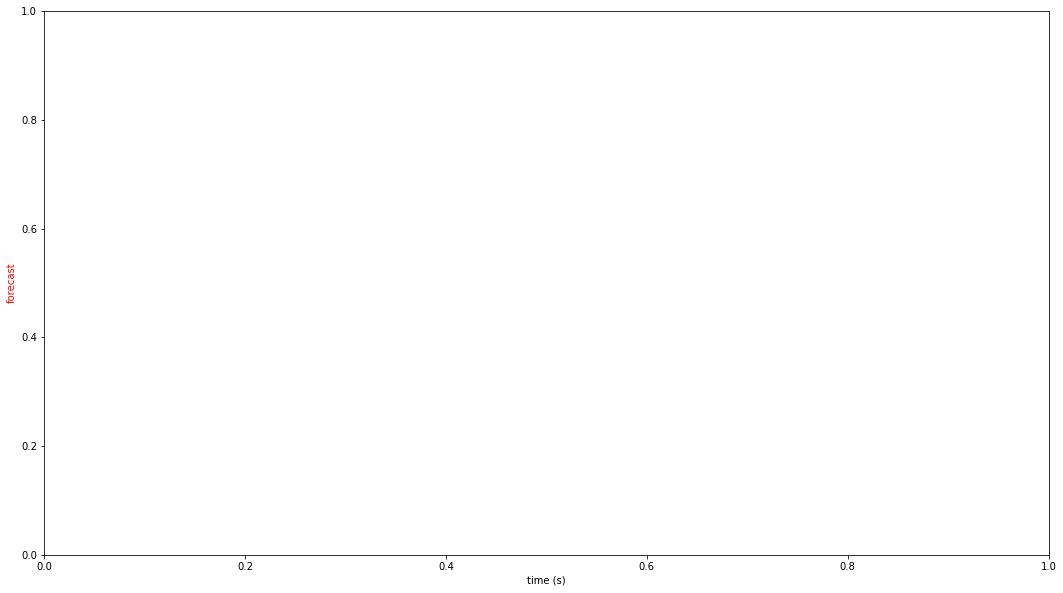

In [5]:
fig, ax1 = plt.subplots(figsize=(18,10))

ax1.set_xlabel('time (s)')
ax1.set_ylabel('shares', color='black')
ax1.set_ylabel('forecast', color='red')
ax1.plot(df.test_y, color='black')
ax1.plot(df.forecast, 'r--')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('konkorde', color=color)  # we already handled the x-label with ax1
ax2.set_ylim((-1.5, 10.0))
ax2.axhline(0, color='#CCCCCC')
ax2.axhline(0.25, color='#CCCCCC', linestyle='--')
ax2.plot(df.verde+df.azul, color='green', alpha=0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [6]:
df

,test_y,forecast,verde,azul
0,76.00,75.19,0.74,0.03
1,75.60,75.83,0.61,-0.02
2,75.38,75.81,0.52,-0.05
3,74.16,75.65,0.32,-0.04
4,73.40,75.30,0.24,-0.04
...,...,...,...,...
233,78.96,77.99,-0.14,0.15
234,76.64,79.28,-0.48,-0.13
235,75.76,77.79,-0.58,-0.12
236,75.50,76.35,-0.57,-0.14


In [8]:
df.to_csv('/Users/renero/trader/output/forecast_acciona_konkorde_2018b.csv', sep=',', index=False)